## RNASeq Concordance for SJINF053

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Inputs
John processed fastq's using python directly in a virtualenv

Rob processed fastq's using RNASeq Docker 2.0.8 via Treeshop

They both used the same references:

    3e66bf493ff1c12582cd05aeeedc648f  kallisto_hg38.idx
    6b86ffe9530ebbcb0572edd64cb86cd5  rsem_ref_hg38_no_alt.tar.gz
    71331de455188b52f03450cdade807ed  starIndex_hg38_no_alt.tar.gz

and the same input fastqs:

    50060f802dc2102ddebbedb80117332b  /scratch/rcurrie/EGAD00001001098/_EGAR00001270150_SJINF053_D-H8F5YADXX.R1.fq.gz
    207c99fc482776bcaa3e7ebcc2049dd5  /scratch/rcurrie/EGAD00001001098/_EGAR00001270150_SJINF053_D-H8F5YADXX.R2.fq.gz


The core processed two pairs of fastqs:
/pod/pstore/groups/treehouse/published-data/stjude/EGAD00001001098/fastqV2

    _EGAR00001270150_SJINF053_D-H8F5YADXX.1.R1.fq.gz
    _EGAR00001270150_SJINF053_D-H8F5YADXX.1.R2.fq.gz
    _EGAR00001270151_SJINF053_D-H8F5YADXX.2.R1.fq.gz
    _EGAR00001270151_SJINF053_D-H8F5YADXX.2.R2.fq.gz


### JV 2.0.8 vs. JV 3.0.2

In [39]:
A = pd.read_csv("/scratch/rcurrie/jv/jv_TEST_208_SJINF053_rsem_genes.results", sep="\t")
B = pd.read_csv("/scratch/rcurrie/jv/jv_TEST_302_SJINF053_rsem_genes.results", sep="\t")

diff = A["expected_count"] - B["expected_count"]
diff = diff.abs()
print "Count of non-zero differences", diff.astype(bool).sum()
print "Max difference", diff.max()

Count of non-zero differences 234
Max difference 2.0


### Treeshop 2.0.8 vs. JV 2.0.8

In [38]:
A = pd.read_csv("/scratch/rcurrie/2.0.8.treeshop/SJINFO53/RSEM/rsem_genes.results", sep="\t")
B = pd.read_csv("/scratch/rcurrie/jv/jv_TEST_208_SJINF053_rsem_genes.results", sep="\t")

diff = A["expected_count"] - B["expected_count"]
diff = diff.abs()
print "Count of non-zero differences", diff.astype(bool).sum()
print "Max difference", diff.max()

Count of non-zero differences 15890
Max difference 3290.11


### Core 3.1.3 vs. JV 2.0.8

In [41]:
A = pd.read_csv("/scratch/rcurrie/3.1.3.core/SJINFO53/RSEM/rsem_genes.results", sep="\t")
B = pd.read_csv("/scratch/rcurrie/jv/jv_TEST_208_SJINF053_rsem_genes.results", sep="\t")

diff = A["expected_count"] - B["expected_count"]
diff = diff.abs()
print "Count of non-zero differences", diff.astype(bool).sum()
print "Max difference", diff.max()

Count of non-zero differences 15894
Max difference 3284.13


### Core 3.1.3 vs. JV 3.0.2

In [42]:
A = pd.read_csv("/scratch/rcurrie/3.1.3.core/SJINFO53/RSEM/rsem_genes.results", sep="\t")
B = pd.read_csv("/scratch/rcurrie/jv/jv_TEST_302_SJINF053_rsem_genes.results", sep="\t")

diff = A["expected_count"] - B["expected_count"]
diff = diff.abs()
print "Count of non-zero differences", diff.astype(bool).sum()
print "Max difference", diff.max()

Count of non-zero differences 15893
Max difference 3284.12


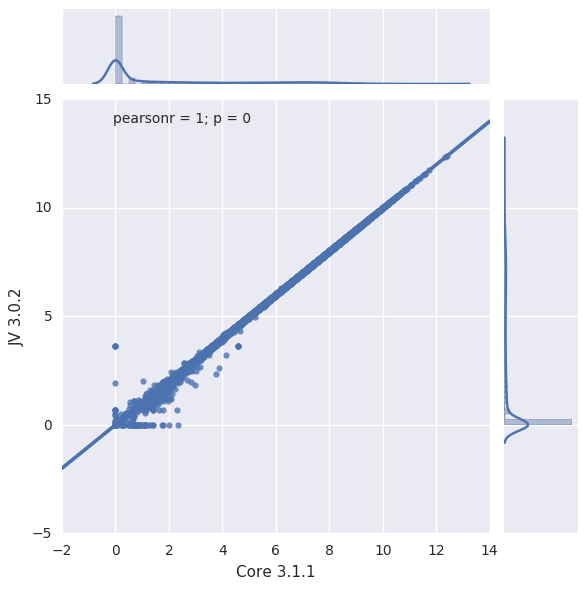

In [37]:
sns.jointplot(A.expected_count.apply(lambda x: np.log(x+1)),
              B.expected_count.apply(lambda x: np.log(x+1)), 
              kind='reg')
plt.xlabel("Core 3.1.1")
plt.ylabel('JV 3.0.2')

### Multi-file Core 3.1.3 vs. Treeshop 2.0.8

In [23]:
import tarfile
import io
import pandas as pd

In [24]:
def rnaseq_tar_to_dataframe(path):
    """ 
    Extract rsem_genes.results from the tar.gz output from cgl-rnaseq into a dataframe 
    """
    with open(path) as gz:
        with tarfile.open(fileobj=io.BytesIO(gz.read()), mode="r:gz") as tar:
            rsem_genes_results_path = [name for name in tar.getnames() if "rsem_genes.results" in name][0]
            return pd.read_csv(tar.extractfile(rsem_genes_results_path), sep="\t")

In [25]:
# Load core and treeshop files into two dictionaries of dataframes
core_root = "/scratch/wshands/Core_Analysis_results/Treehouse_QC_results/RNA-Seq_3_1_3"

core = {
    "TH03_0029_S01": rnaseq_tar_to_dataframe(
        "{}/{}".format(core_root, "0be4890a-549d-4b19-bf8c-326c17ad207e/TH03_0029_S01.tar.gz")),
    "TH03_0107_S01": rnaseq_tar_to_dataframe(
        "{}/{}".format(core_root, "2fcbe2f6-7063-42a0-8b24-d004b325c33d/TH03_0107_S01.tar.gz")),
    "7316-804-RNA_400267": rnaseq_tar_to_dataframe(
        "{}/{}".format(core_root, "47e1f09d-925d-4cec-8613-425aed23db78/7316-804-RNA_400267.tar.gz")),
    "SJINFO53": rnaseq_tar_to_dataframe(
        "{}/{}".format(core_root, "9c3a7add-8706-44c0-86e2-0b10e5c00a96/SJINFO53.tar.gz")),
    "_EGAR00001124508_RNA-seq_PAIRED_ICGC_PA117_s_120705_4b": rnaseq_tar_to_dataframe(
        "{}/{}".format(core_root, "da703de6-75d5-4ffe-a782-beb5ea4da347/_EGAR00001124508_RNA-seq_PAIRED_ICGC_PA117_s_120705_4b.tar.gz")),
    "TH03_0014_S01": rnaseq_tar_to_dataframe(
        "{}/{}".format(core_root, "ecdc266a-cf3f-4aba-80f2-0bb8c5db8723/TH03_0014_S01.tar.gz"))
    }

In [26]:
treeshop_root = "/scratch/rcurrie/2.0.8.treeshop"

treeshop = {sample_id: pd.read_csv(
        "{}/{}/RSEM/rsem_genes.results".format(treeshop_root, sample_id), sep="\t") for sample_id in core.keys()}

In [29]:
print "Core 3.1.3 vs. Treeshop 2.0.8\n"
for sample_id in core.keys():
    diff = core[sample_id]["expected_count"] - treeshop[sample_id]["expected_count"]
    diff = diff.abs()
    print "{}:\n {} non-zero differences\n {} Max difference\n".format(sample_id, diff.astype(bool).sum(), diff.max())

Core 3.1.3 vs. Treeshop 2.0.8

_EGAR00001124508_RNA-seq_PAIRED_ICGC_PA117_s_120705_4b:
 3752 non-zero differences
 958.24 Max difference

TH03_0014_S01:
 0 non-zero differences
 0.0 Max difference

TH03_0029_S01:
 20 non-zero differences
 0.16 Max difference

7316-804-RNA_400267:
 34 non-zero differences
 0.82 Max difference

TH03_0107_S01:
 209 non-zero differences
 8.26000000024 Max difference

SJINFO53:
 1013 non-zero differences
 9.44 Max difference



### Multi-file Core 3.1.3 vs. Core 2.0.X.2016 (i.e. vintage)

In [32]:
core_vintage_root = "/scratch/rcurrie/2.0.X.2016"

core_vintage = {sample_id: pd.read_csv(
        "{}/{}/RSEM/rsem_genes.results".format(treeshop_root, sample_id), sep="\t") for sample_id in core.keys()
           if sample_id != "SJINFO53"}

In [33]:
print "Core 3.1.3 vs. Core 2.0.X.2016\n"
for sample_id in core_vintage.keys():
    diff = core[sample_id]["expected_count"] - core_vintage[sample_id]["expected_count"]
    diff = diff.abs()
    print "{}:\n {} non-zero differences\n {} Max difference\n".format(sample_id, diff.astype(bool).sum(), diff.max())

Core 3.1.3 vs. Core 2.0.X.2016

7316-804-RNA_400267:
 34 non-zero differences
 0.82 Max difference

TH03_0014_S01:
 0 non-zero differences
 0.0 Max difference

TH03_0107_S01:
 209 non-zero differences
 8.26000000024 Max difference

_EGAR00001124508_RNA-seq_PAIRED_ICGC_PA117_s_120705_4b:
 3752 non-zero differences
 958.24 Max difference

TH03_0029_S01:
 20 non-zero differences
 0.16 Max difference

